# Facebook Social Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import igraph as ig
import dionysus as d

In [3]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

## Data import

In [4]:
G = ig.read("data/facebook/facebook.graphml")

In [5]:
G.to_undirected(combine_edges="first")

In [6]:
G.summary()

'IGRAPH UN-- 1899 15737 -- \n+ attr: id (v), name (v), c0 (e), c1 (e), id (e)'

In [7]:
G.es.attributes()

['c0', 'id', 'c1']

In [8]:
G.es['weight'] = np.array(G.es['c0']).astype(int)
G.es['time'] = np.array(G.es['c1']).astype(float)

In [9]:
del G.es['c0']
del G.es['c1']

In [10]:
G.es.attributes()

['time', 'weight', 'id']

## Weight rank clique filtration and persistent homology

In [11]:
from filtration import wrcf

In [12]:
def get_diagram(graph, weight="weight"):
    filt = wrcf(graph, weight=weight)
    pers = d.homology_persistence(filt)
    return(d.init_diagrams(pers, filt))

In [13]:
dgms = get_diagram(G, weight="weight")

In [14]:
dgms

[Diagram with 1899 points,
 Diagram with 414463 points,
 Diagram with 39153 points,
 Diagram with 34 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points]

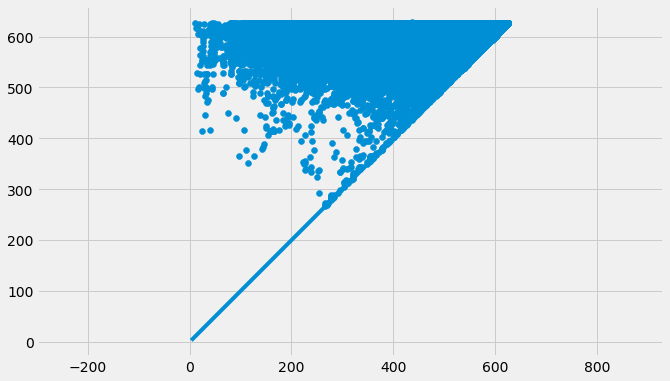

In [21]:
d.plot.plot_diagram(dgms[1])

## Normalize the time scale

In [22]:
time_min = min(G.es["time"])
time_max = max(G.es["time"])
time_min, time_max

(0.0, 18679088.0)

In [23]:
G.es["time"] = (np.array(G.es["time"]) - time_min) / (time_max - time_min)

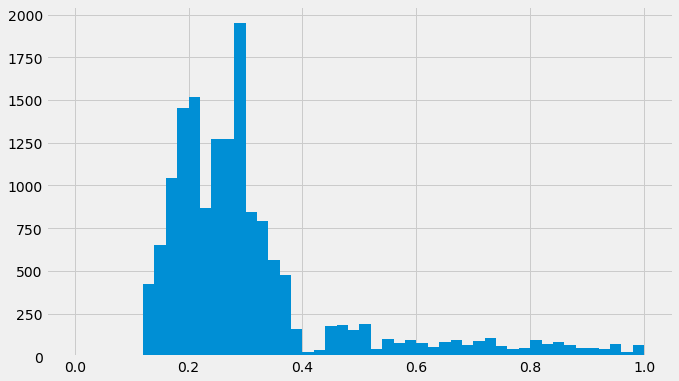

In [24]:
plt.hist(G.es["time"], bins=50);

## Discretize the time scale using non-overlapping windows

In [25]:
N = 16 # Number of windows

In [26]:
subgs = list(range(N))
for i in range(N):
    subgs[i] = G.subgraph_edges(G.es(lambda e: (e["time"] < (i+1)/N) & (e["time"] > i/N)))

In [27]:
G.summary()

'IGRAPH UNW- 1899 15737 -- \n+ attr: id (v), name (v), id (e), time (e), weight (e)'

In [28]:
for g in subgs:
    print(g.summary())

IGRAPH UNW- 2 2 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 35 36 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 742 2455 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 988 3928 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 1121 4569 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 917 2017 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 347 361 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 380 515 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 296 339 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 228 268 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 211 229 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 251 281 -- 
+ attr: id (v), name (v), id (e), time (e), weight (e)
IGRAPH UNW- 181 172 -- 
+ attr: id (v), name (v), id 

## Apply persistent homology to each window

In [29]:
from dask.distributed import Client

In [30]:
client = Client(processes=False)

In [31]:
dgms = client.map(get_diagram, subgs)

In [32]:
dgms = client.gather(dgms)
dgms

distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/21235/7 remote=inproc://129.67.184.177/21235/1>


[[Diagram with 2 points],
 [Diagram with 35 points, Diagram with 2 points],
 [Diagram with 742 points,
  Diagram with 41706 points,
  Diagram with 49 points,
  Diagram with 0 points],
 [Diagram with 988 points,
  Diagram with 119949 points,
  Diagram with 109 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 1121 points,
  Diagram with 147710 points,
  Diagram with 214 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 917 points,
  Diagram with 91056 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 347 points, Diagram with 12632 points, Diagram with 0 points],
 [Diagram with 380 points, Diagram with 18081 points, Diagram with 0 points],
 [Diagram with 296 points, Diagram with 7258 points, Diagram with 0 points],
 [Diagram with 228 points, Diagram with 5888 points, Diagram with 0 points],
 [Diagram with 211 points, Diagram with 6965 points, Diagram with 0 points],
 [Diagram with 251 points, Diagram with 7633 points